In [ ]:
# Initial imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
import seaborn as sns
import pygal  

# Data cleaning  
## In this section, we will need to read the CSV file into DataFrame and perform any necessary data cleaning steps

In [2]:
# Reading data

def dfmake(path):
    """
    Read in a CSV File into a dataframe, and convert date into a datetimeindex
    Args:
        path : The filename and path of the csv file
    Returns:
        The dataframe converted from the CSV file
    """
    path_df=pd.read_csv(path, index_col='Date', infer_datetime_format=True, parse_dates=True)
    return path_df

In [3]:
#import Combined Dataframe
combined_df=dfmake("US&CA Dataset.csv")
combined_df.head()


,Inflation_US,Inflation_CA,Covid_Cases_US,Covid_Cases_CA
Date,,,,
2021-12-01,7.1,1.9,1857993914,70660679
2021-11-01,6.8,1.9,1418982171,52864275
2021-10-01,6.2,2.0,1392031827,52220644
2021-09-01,5.4,2.2,1249406449,47080268
2021-08-01,5.3,2.4,1150163602,45460750


In [7]:
# Count nulls
combined_df.isnull().sum()

Inflation_US      0
Inflation_CA      1
Covid_Cases_US    0
Covid_Cases_CA    0
dtype: int64

In [11]:
# Check Data Types
combined_df.dtypes

Inflation_US      float64
Inflation_CA      float64
Covid_Cases_US      int64
Covid_Cases_CA      int64
dtype: object

# Conduct Quantitative Analysis


In [ ]:
#plot US Covid cases
#combined_df["Covid_Cases_US"].plot.bar(figsize=(20,10), title= "US covide cases")

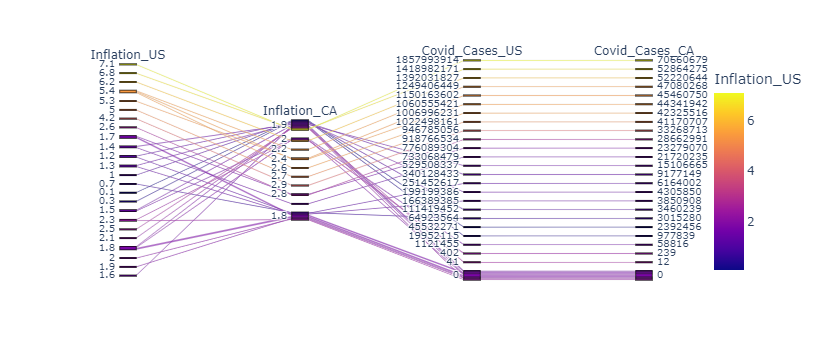

In [47]:
px.parallel_categories(
    combined_df,
    dimensions=["Inflation_US","Inflation_CA","Covid_Cases_US","Covid_Cases_CA"],
    color="Inflation_US",
)

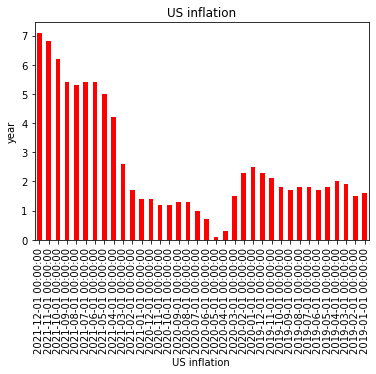

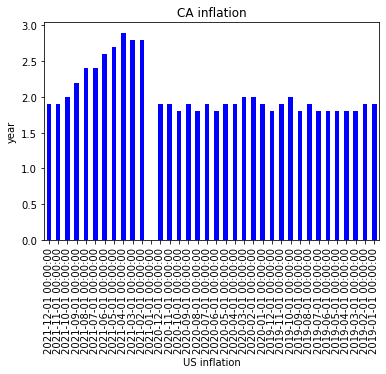

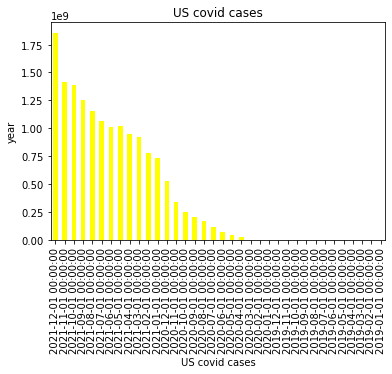

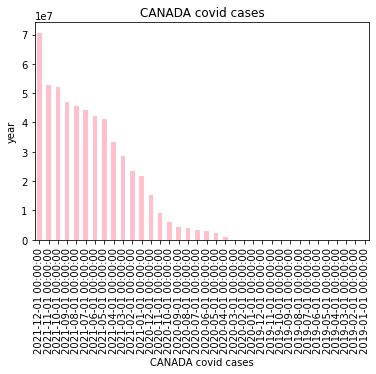

In [15]:
# create_bar_chart function
def create_bar_chart(data, title, xlabel, ylabel, color):
    """
    #Create a barplot based in the data argument.
     """
    fig=plt.figure()
    bar_plot=data.plot.bar(color=color) 
    bar_plot.set_xlabel(xlabel)
    bar_plot.set_ylabel(ylabel)
    bar_plot.set_title(title)



# Bar chart for US inflation 
create_bar_chart(combined_df["Inflation_US"],title="US inflation",
                 xlabel="US inflation ", ylabel="year",color="red")

# Bar chart for CANADA inflation 
create_bar_chart(combined_df["Inflation_CA"],title="CA inflation",
                 xlabel="US inflation", ylabel="year",color="blue")
# Bar chart for US covid cases 
create_bar_chart(combined_df["Covid_Cases_US"],title="US covid cases",
                 xlabel="US covid cases", ylabel="year",color="yellow")
# Bar chart for canada covid cases 
create_bar_chart(combined_df["Covid_Cases_CA"],title="CANADA covid cases",
                 xlabel="CANADA covid cases", ylabel="year",color="pink")

In [ ]:
#plot Canada covid cases
#combined_df["Covid_Cases_CA"].sort_values(ascending=False).plot.bar(figsize=(30,15), title= "CA covide cases")


In [ ]:
#plot US Inflation
#combined_df["Inflation_US"].sort_values(ascending=False).plot.bar(figsize=(30,15), title= "The inflation Rate of US")

In [ ]:
#plot Canada Inflation
#combined_df["Inflation_CA"].sort_values(ascending=False).plot.bar(figsize=(30,20),title= "The inflation Rate of CANADA ")

# Average covid cases in US and Canada 

In [28]:
avg_covid_cases=(combined_df[["Covid_Cases_US","Covid_Cases_CA"]])

In [41]:
avg_covid_cases=avg_covid_cases.reset_index()
avg_covid_cases.head()


,index,Date,Covid_Cases_US,Covid_Cases_CA
0,0,2021-12-01,1857993914,70660679
1,1,2021-11-01,1418982171,52864275
2,2,2021-10-01,1392031827,52220644
3,3,2021-09-01,1249406449,47080268
4,4,2021-08-01,1150163602,45460750


###  Plot data using parallel_coordinates plot

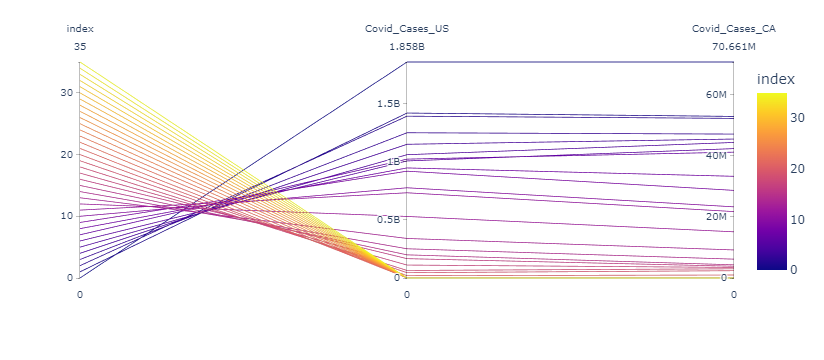

In [43]:
px.parallel_coordinates(avg_covid_cases, color="index")

In [ ]:
#correlation with seaborn heatmap
correlation=combined_df.corr()
sns.heatmap(correlation, vmin=-1, vmax=1)


In [ ]:
#change in covid cases

In [18]:
#mean covid cases
covid_cases=combined_df[["Covid_Cases_US","Covid_Cases_CA"]].mean()
covid_cases
#ovid_cases.hvplot()

Covid_Cases_US    4.239712e+08
Covid_Cases_CA    1.532126e+07
dtype: float64

In [ ]:
#average covid cases


In [20]:
#mean inflation rate
inflation=combined_df[["Inflation_US","Inflation_CA"]].mean()
inflation

Inflation_US    2.591667
Inflation_CA    2.042857
dtype: float64

In [ ]:
#average inflation rate


In [ ]:
#change in inflation rate

In [24]:
#standard deviation inflation rate
inflation.std

<bound method NDFrame._add_numeric_operations.<locals>.std of Inflation_US    2.591667
Inflation_CA    2.042857
dtype: float64>

<AxesSubplot:xlabel='Date'>

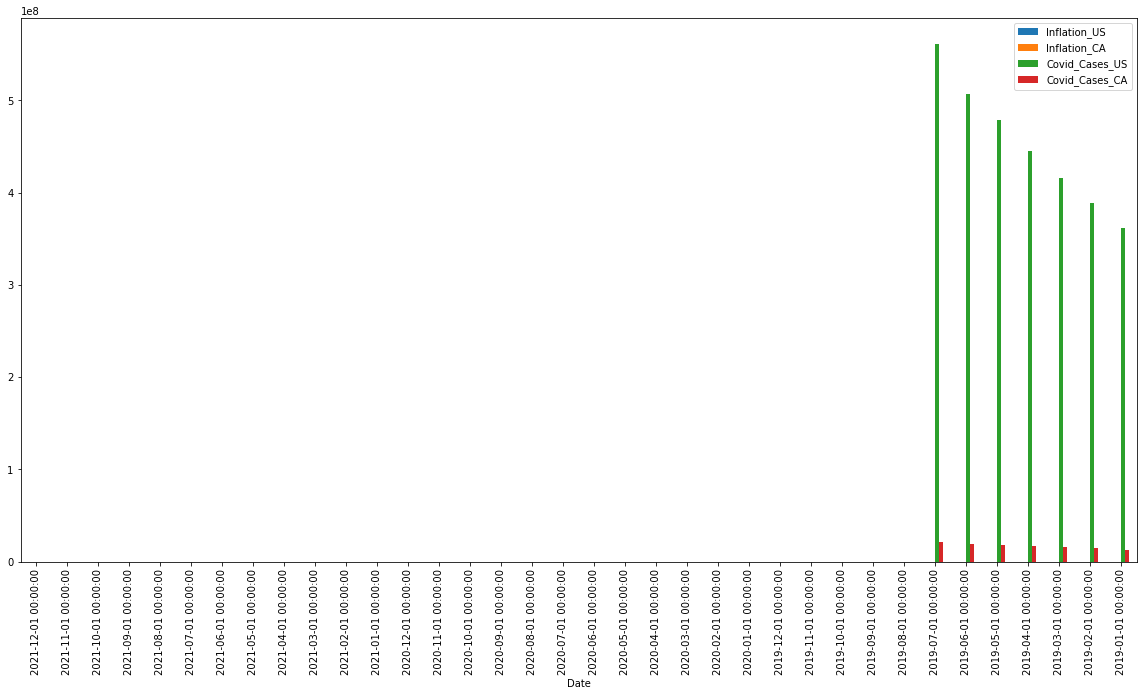

In [36]:
#rolling standard deviation rate 30 days
combined_df.rolling(window=30).std().plot.bar(figsize=(20,10))


<AxesSubplot:xlabel='Date'>

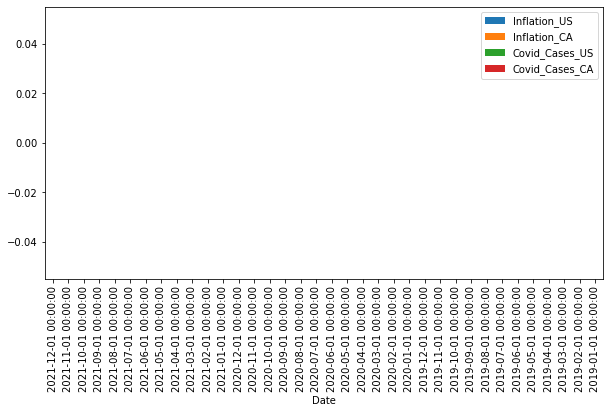

In [40]:
#rolling annual standard deviation
combined_df.rolling(window=200).std().plot.bar(figsize=(10,5))


In [ ]:
#p value